In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0 한글 폰트

In [2]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"

--2020-03-09 17:57:32--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.191.128, 2607:f8b0:4001:c0c::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  54.7MB/s    in 2.1s    

2020-03-09 17:57:35 (54.7 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Thi

In [0]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = "Noto Sans CJK KR"

# 1. 데이터 읽기 

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
Part3: Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

# 1. 데이터 불러오기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = "/content/drive/My Drive/" + "_data/data_dacon/temperature_forecasts/"

In [8]:
df = pd.read_csv(data_dir+'train.csv')
df.shape

(4752, 60)

* 4320개(30일)
* 432개(3일) 

|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

In [0]:
n = 4320

## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
#feat_x = [feat_temp, feat_air_press, feat_wind_speed, feat_rainfall, feat_sea_press, feat_insol, feat_humid, feat_dir_wind]
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

In [11]:
df[feat_x].head(2)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0


## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [13]:
df[feat_y].shape

(4752, 18)

null 값이 없는 부분만 추출 

In [14]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

### y 그룹화

6개의 그룹으로 나눠보기로 한다. 

'Y03', 'Y04'  
'Y00'  
'Y05', 'Y08', 'Y14'  
'Y13','Y01', 'Y02'  
'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
'Y12', 'Y06', 'Y07'



In [0]:
df_y_g1 = df_y[['Y03', 'Y04']]
df_y_g2 = df_y[['Y00']]
df_y_g3 = df_y[['Y05', 'Y08', 'Y14']]
df_y_g4 = df_y[['Y13','Y01', 'Y02']]
df_y_g5 = df_y[['Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16']]
df_y_g6 = df_y[['Y12', 'Y06', 'Y07']]

# g1

## x[feat_temp],  y

관측소 5곳 온도와 그룹화된 y들을 비교해본다. 

In [0]:
class correlation_x_y():
    def __init__(self, dfX, dfY):
        self.df = pd.concat([dfX, dfY], axis=1, sort=False)
        self.df_corr = self.df.corr()
        self.kX = len(dfX.columns)
        self.kY = len(dfY.columns)
        self.df.describe()
    def corr(self):
        print(self.df_corr.iloc[:self.kX, -self.kY:])
    def heatmap(self, figsize = (5, 4), cmap='coolwarm', vmin=0.8):
        plt.figure(figsize=figsize)
        sns.heatmap(self.df_corr.iloc[:self.kX, -self.kY:], cmap=cmap, vmin=vmin) 
    def corr_mean(self):
        print(self.df_corr.iloc[:self.kX, -self.kY:].mean(axis=0))

### x[feat_temp], y_g1

In [0]:
tmp_df = df_y_g1
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y03  0.729502  0.841002  0.857562  0.758773  0.747431
Y04  0.728564  0.840372  0.856534  0.758412  0.746524


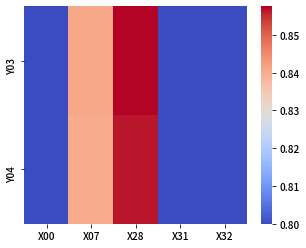

In [0]:
g.heatmap()

In [0]:
g.corr_mean()

X00    0.729033
X07    0.840687
X28    0.857048
X31    0.758593
X32    0.746978
dtype: float64


g1은 평균적으로 X28, X07과 가장 유사하다.  

### x[feat_temp], y_g2

In [0]:
tmp_df = df_y_g2
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07      X28       X31       X32
Y00  0.912809  0.979172  0.97449  0.918779  0.921823


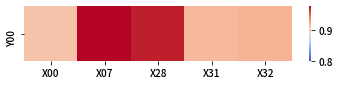

In [0]:
g.heatmap((6, 1))

In [0]:
g.corr_mean()

X00    0.912809
X07    0.979172
X28    0.974490
X31    0.918779
X32    0.921823
dtype: float64


g2는 X7과 X28과 가장 유사하다. 

### x[feat_temp], y_g3

In [0]:
tmp_df = df_y_g3
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y05  0.906096  0.892414  0.864041  0.899776  0.901241
Y08  0.902829  0.897089  0.872612  0.896547  0.894345
Y14  0.911123  0.931548  0.916300  0.915336  0.906674


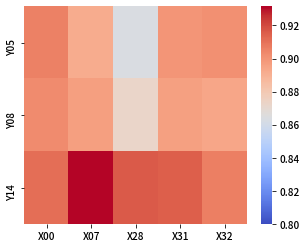

In [0]:
g.heatmap()

In [0]:
g.corr_mean()

X00    0.906683
X07    0.907017
X28    0.884318
X31    0.903886
X32    0.900753
dtype: float64


g3은 평균적으로 4군데와 비슷한 수준으로 유사하다.


### x[feat_temp], y_g4

In [0]:
tmp_df = df_y_g4
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y13  0.951228  0.958731  0.938310  0.950045  0.950898
Y01  0.951641  0.970238  0.953917  0.956140  0.956146
Y02  0.954500  0.973252  0.958521  0.957152  0.960426


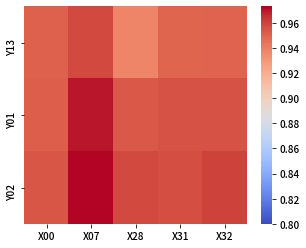

In [0]:
g.heatmap()

In [0]:
g.corr_mean()

X00    0.952456
X07    0.967407
X28    0.950249
X31    0.954445
X32    0.955823
dtype: float64


g4는 평균적으로 모든 지역과 비슷한 수준으로 유사하다. 

### x[feat_temp], y_g5

In [0]:
tmp_df = df_y_g5
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y09  0.947931  0.923403  0.889321  0.947002  0.951074
Y10  0.945833  0.931275  0.899919  0.947893  0.950790
Y11  0.933180  0.911746  0.879923  0.932860  0.936655
Y17  0.911654  0.885659  0.849162  0.905867  0.911813
Y15  0.925800  0.906402  0.874344  0.919587  0.929539
Y16  0.923968  0.891921  0.855365  0.917060  0.923795


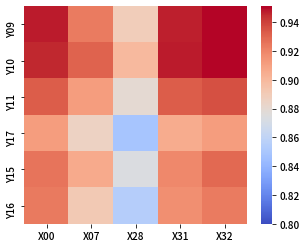

In [0]:
g.heatmap()

In [0]:
g.corr_mean()

X00    0.931394
X07    0.908401
X28    0.874672
X31    0.928378
X32    0.933944
dtype: float64


g5은 평균적으로 X32, X00와 가장 유사하다.  

### x[feat_temp], y_g6

In [0]:
tmp_df = df_y_g6
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y12  0.825280  0.778135  0.733078  0.817218  0.830264
Y06  0.840827  0.795471  0.752037  0.838379  0.852777
Y07  0.746129  0.698961  0.652907  0.743822  0.763417


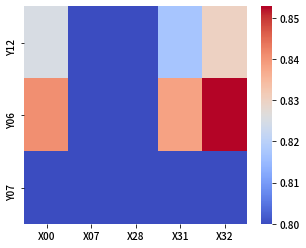

In [0]:
g.heatmap()

In [0]:
g.corr_mean()

X00    0.804078
X07    0.757522
X28    0.712674
X31    0.799806
X32    0.815486
dtype: float64


다른 그룹들 보다는 유사성이 떨어지는 것처럼 보이지만 여전히 0.7이 넘는 높은 상관관계를 갖는다.

# tmp

In [0]:
for i in range(18):
    print("'Y{:02}',".format(i), end=' ')

'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 

In [0]:
tmp = 'X13, X15, X17, X25, X35'
for i in tmp.split(', '):
    print("'{}',".format(i), end=' ')